# Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read & Check Data

In [2]:
#Read the data
org_df = pd.read_csv('Dataset.csv')
df = org_df.copy()
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#number of rows and columns of df_train dataset
df.shape

(13320, 9)

In [4]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#mathematical overview of the numerical data
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
# mathematical overview of the object data
df.describe(include="object")

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


<ipython-input-7-8d748738f694>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<AxesSubplot: >

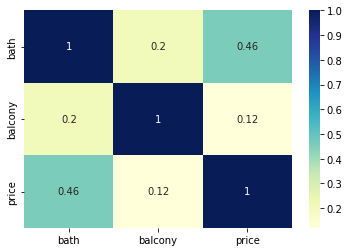

In [7]:
#correlation
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

From above information, balcony column has very less correlation with price and bath so, we can remove this column

In [8]:
#Number of unique values
for feature in df:
    print(f"{feature}",df[feature].nunique())

area_type 4
availability 81
location 1305
size 31
society 2688
total_sqft 2117
bath 19
balcony 4
price 1994


# Data Cleaning

In [9]:
#Percentage of missing values
df.isnull().sum()*100/df.shape[0]

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

From above information, society column has more than 30% of missing values so, we can remove this column
and other can be filled with mean, mode or simply drop those rows.

In [10]:
#drop unnecessary features
df = df.drop(['society','availability'],axis=1)
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
#Shape of the dataset
df.shape

(13320, 7)

In [12]:
#droping missing values
df=df.dropna()
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
#Shape after droping missing values
df.shape

(12710, 7)

In [14]:
df2=df.copy()
#unique values in total_sqft feature
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

As we can see here, there are some unstructured data here.

In [15]:
#Extract all unstructured data
def is_float(x):
    try:
        float(x) # converting a value into float
    except:
        return False # it will return unstructured data
    return True

In [16]:
#returns all the values with unstructed data
#The negation operator in Python is not.
#It reverse the truth value of its operand
df2[~df2['total_sqft'].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800


for range values(e.g., 2100 - 2850) in total_sqft we will take its average value.

In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df3=df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3=df3[df3.total_sqft.notnull()]
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [19]:
df3.shape

(12668, 7)

# Feature Engineering

In [20]:
#Unique values in size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

As you can see here, BHK (The term BHK is the acronym for 'Bedroom, Hall, Kitchen') and bedroom somewhat refer to same thing so, we will make a new column which will have only number.

In [21]:
#Spliting a string values in the specfic column
df3['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [22]:
#convert datatype of bath from float to int
df3=df3.astype({'bath':'int'})
df3.shape

(12668, 8)

In [23]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2,1.0,51.00,2,4250.000000


We know that in real estate market <b>price per square feet</b> is very important, but we didn't have this in our dataset so, we have to create this column <i>(for outlier detection)</i>.<br>
<i>(we multiplied 100000 in above equation because the price is in lakh rupess.)</i>

In [24]:
# total number of unique values in column location
df3['location'].nunique()

1259

As we can see here, in the column location there are too many unique categorical values which will create a dimensionality problem in future so, we need to take most frequent variables and other remaning categories will be transformed into completely new category that can be named as 'others'.

In [25]:
#to remove extra spaces 
df3['location']=df3['location'].apply(lambda x:x.strip())

In [26]:
location_stats = df3['location'].value_counts()
location_stats

Whitefield           514
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       259
Thanisandra          233
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: location, Length: 1248, dtype: int64

In [27]:
#location_stats that have less than 10 values
len(location_stats[location_stats<=10])

1013

In [28]:
#All categories in location_stats that have less than 10 values
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Nagappa Reddy Layout     10
Dairy Circle             10
                         ..
Subbannaiah Palya         1
whitefiled                1
Medi Agrahara             1
Sadduguntepalya           1
Abshot Layout             1
Name: location, Length: 1013, dtype: int64

In [29]:
# Categories all the values that have less than 10 values in location column
df3['location']=df3.location.apply(lambda x:'Other' if x in location_stats_lessthan_10 else x)

In [30]:
#Number of unique values in location column
df3['location'].nunique()

236

# Outlier

The average size of a master bedroom is 14 x 16 feet. It may be bigger than that but 300 square footage is a minimum.

In [31]:
#outliers
df3[df3.total_sqft/df3.bhk<300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7,0.0,85.0,8,6296.296296
70,Plot Area,Other,3 Bedroom,500.0,3,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6,3.0,160.0,6,22535.211268


In [32]:
df.shape

(12710, 7)

In [33]:
#removing outliers
df4 = df3[~(df3.total_sqft/df3.bhk<300)]

In [34]:
#shape after removing outliers
df4.shape

(12013, 9)

In [35]:
#mathematical overview of the price_per_sqft
df4.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

As we can see here, that the minimum value of price_per_sqft is 267, but in bengaluru getting 267 price per sqft is very low so, it may be a outlier.<br>
And the maximum value of price_per_sqft is 176470 which can be possible for prime area but here we are building a generic model it makes sense to remove this kind of extreme cases.

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft) #mean of the price_per_sqft
        st = np.std(subdf.price_per_sqft) #standard deviation of the price_per_sqft
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [37]:
df5 = remove_pps_outliers(df4)
#shape after removing outliers
df5.shape

(9852, 9)

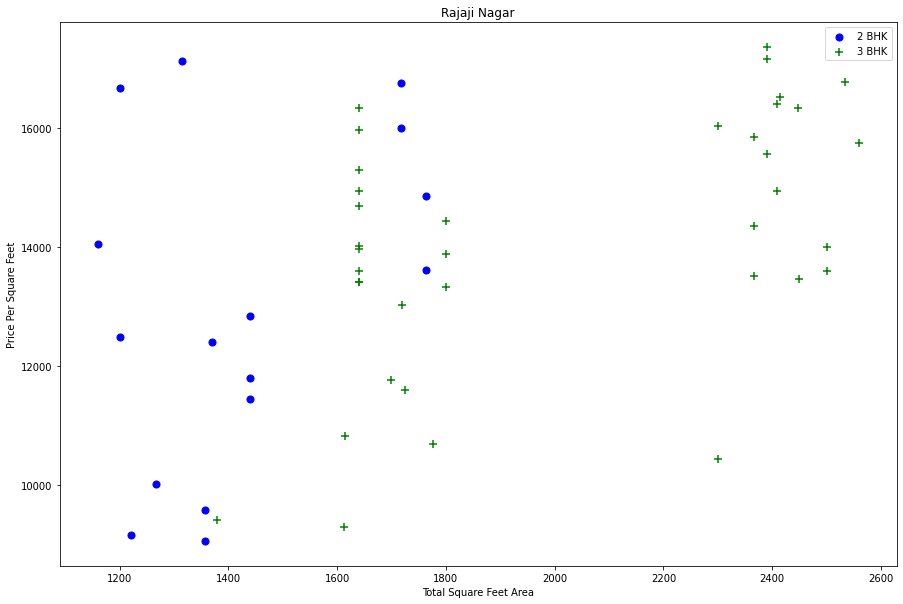

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df5,"Rajaji Nagar")    

From above visualization, we can see that in some cases 2BHK has more price than 3BHK for the same square feet area they can be considered as outliers
so, we will deal with them in outlier section.

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [40]:
df6 = remove_bhk_outliers(df5)
#shape after removing outliers
df6.shape

(7014, 9)

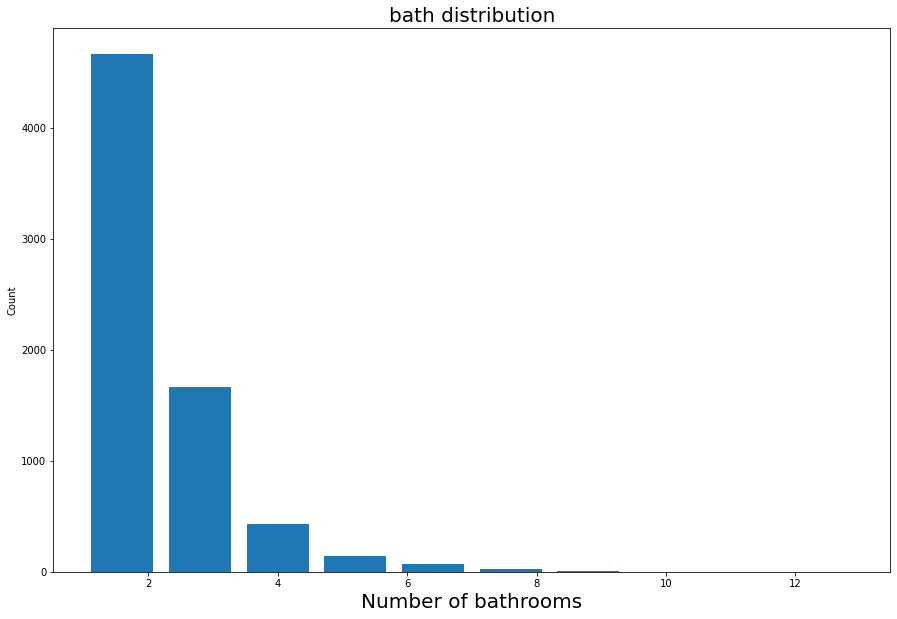

In [41]:
plt.hist(df6['bath'],rwidth=0.8)
plt.title('bath distribution',fontsize=20)
plt.xlabel('Number of bathrooms',fontsize=20)
plt.ylabel('Count')
plt.show()

Here, we can see that there are some outliers where there are more number of bathrooms.<br>
As we know that the number of bathroom wouldn't be greater than number of bedrooms but sometimes we can have number of bathroom+2 for the number of bedrooms but more than it will be unusual.

In [42]:
df6[df6.bath>df6.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7,2.0,80.0,4,3252.032520
5578,Super built-up Area,Other,6 BHK,11338.0,9,1.0,1000.0,6,8819.897689
8658,Super built-up Area,Thanisandra,3 BHK,1806.0,6,2.0,116.0,3,6423.034330


In [43]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(6947, 9)

In [44]:
#drop unnecessary features
df8=df7.drop(['size','price_per_sqft'],axis=1)
df8.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2,2.0,148.0,2


Here we droped size as we already have bhk column replacing it and 
price_per_sqft as we created it for just outlier detection.<br>
location column is in categorical as we know that machine learning algorithm do not works well with categorical features so we need to convert it to numerical feature.

In [45]:
# Mapping unique values in area_type to a numerical representation
area_type_mapper = {}
c = 0
for typ in df8.area_type.unique():
    area_type_mapper[typ]=c
    c+=1
    
# Mapping unique values in location to a numerical representation
location_mapper = {}
c = 0
for location in df8.location.unique():
    location_mapper[location]=c
    c+=1

In [46]:
# Converting Categorical Feature to its Numerical Representation
df8['area_type']=list(map(lambda l:area_type_mapper[l], df8['area_type'].values))
df8['location']=list(map(lambda l:location_mapper[l], df8['location'].values))

In [47]:
df8.shape

(6947, 7)

In [48]:
df8.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,0,0,2850.0,4,1.0,428.0,4
1,0,0,1630.0,3,2.0,194.0,3
2,0,0,1875.0,2,3.0,235.0,3
3,1,0,1200.0,2,0.0,130.0,3
4,0,0,1235.0,2,2.0,148.0,2


# Model Building

In [49]:
# x will be have only independent features
X=df8.drop('price',axis=1)
X.head()

,area_type,location,total_sqft,bath,balcony,bhk
0,0,0,2850.0,4,1.0,4
1,0,0,1630.0,3,2.0,3
2,0,0,1875.0,2,3.0,3
3,1,0,1200.0,2,0.0,3
4,0,0,1235.0,2,2.0,2


In [50]:
# y will be have only dependent features
y=df8.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [51]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [52]:
#model building
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.64770318137114

In [53]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.6486252106692706

In [54]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7221397662251607

In [55]:
#K fold cross validation 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

print("Linear regression:",cross_val_score(LinearRegression(), X, y, cv=cv))
print("Lasso regression:",cross_val_score(Lasso(), X, y, cv=cv))
print("Decision tree regression:",cross_val_score(DecisionTreeRegressor(), X, y, cv=cv))

Linear regression: [0.68563263 0.66696475 0.6714391  0.68180414 0.69054186]
Lasso regression: [0.68554582 0.66696508 0.67092247 0.68070202 0.69026737]
Decision tree regression: [0.47666287 0.67407919 0.57726288 0.71856573 0.56812271]


Based on above results we can say that DecisionTree gives the best score. Hence we will use that.

#### Test the model for few properties

In [56]:
def predict_price(area_type, location, sqft, bath, balcony, bhk):    

    x = np.zeros(len(X.columns))
    x[0] = area_type_mapper[area_type]
    x[1] = location_mapper[location]
    x[2] = sqft
    x[3] = balcony
    x[4] = bath
    x[5] = bhk
    df = pd.DataFrame([x], columns=X.columns)
    return clf.predict(df)[0]

In [57]:
predict_price('Built-up  Area', '1st Phase JP Nagar',1000, 2, 1, 2)

60.0

In [58]:
predict_price('Super built-up  Area', '1st Phase JP Nagar', 1000, 3, 2, 3)

53.0

### Saving the Model

In [60]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)